In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
stock=pd.read_csv("C:\\Users\\Siva\\Desktop\\ExcelR\\Project\\AAPL.csv")
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [4]:
import sklearn.metrics  
def RMSE(pred,org):
    value=np.sqrt(sklearn.metrics.mean_squared_error(org, pred)  )
    return value


In [5]:
train=stock.iloc[:1501,:]
test=stock.iloc[1501:,:]
train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
1496,2017-12-12,172.149994,172.389999,171.460007,171.699997,165.514481,19409200
1497,2017-12-13,172.500000,173.539993,172.000000,172.270004,166.063950,23818400
1498,2017-12-14,172.399994,173.130005,171.649994,172.220001,166.015747,20476500
1499,2017-12-15,173.630005,174.169998,172.460007,173.970001,167.702698,40169300


In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima110 = SARIMAX(train['Close'], 
                 order=(1,1,0),
                seasonal_order=(1,1,0,252))

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                 1501
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 252)   Log Likelihood               -2607.038
Date:                             Fri, 07 Apr 2023   AIC                           5220.076
Time:                                     14:32:41   BIC                           5235.463
Sample:                                          0   HQIC                          5225.861
                                            - 1501                                         
Covariance Type:                            approx                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0123      0.028      0.435      0.664      -0.043       0.068
ar.S.L252     -0.4615      

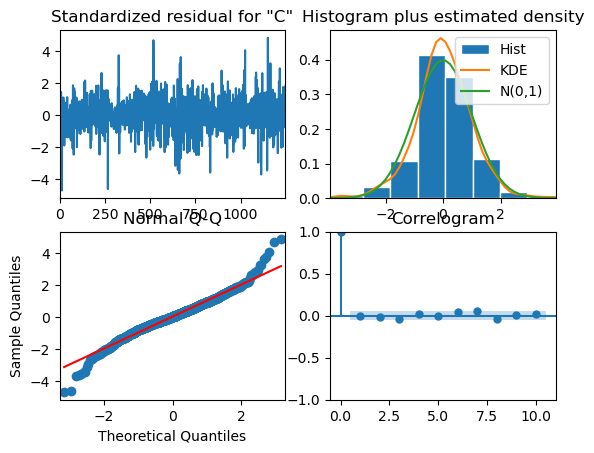

In [7]:
model110=sarima110.fit(disp=False,low_memory=True)

print(model110.summary())
print(model110.plot_diagnostics())

In [8]:
train_pred110=model110.predict(start=train.Close.index[0], end=train.Close.index[-1])
test_pred110=model110.predict(start=test.Close.index[0], end=test.Close.index[-1])
print('RMSE:' ,RMSE(test_pred110,test.Close))

RMSE: 29.43553992509872


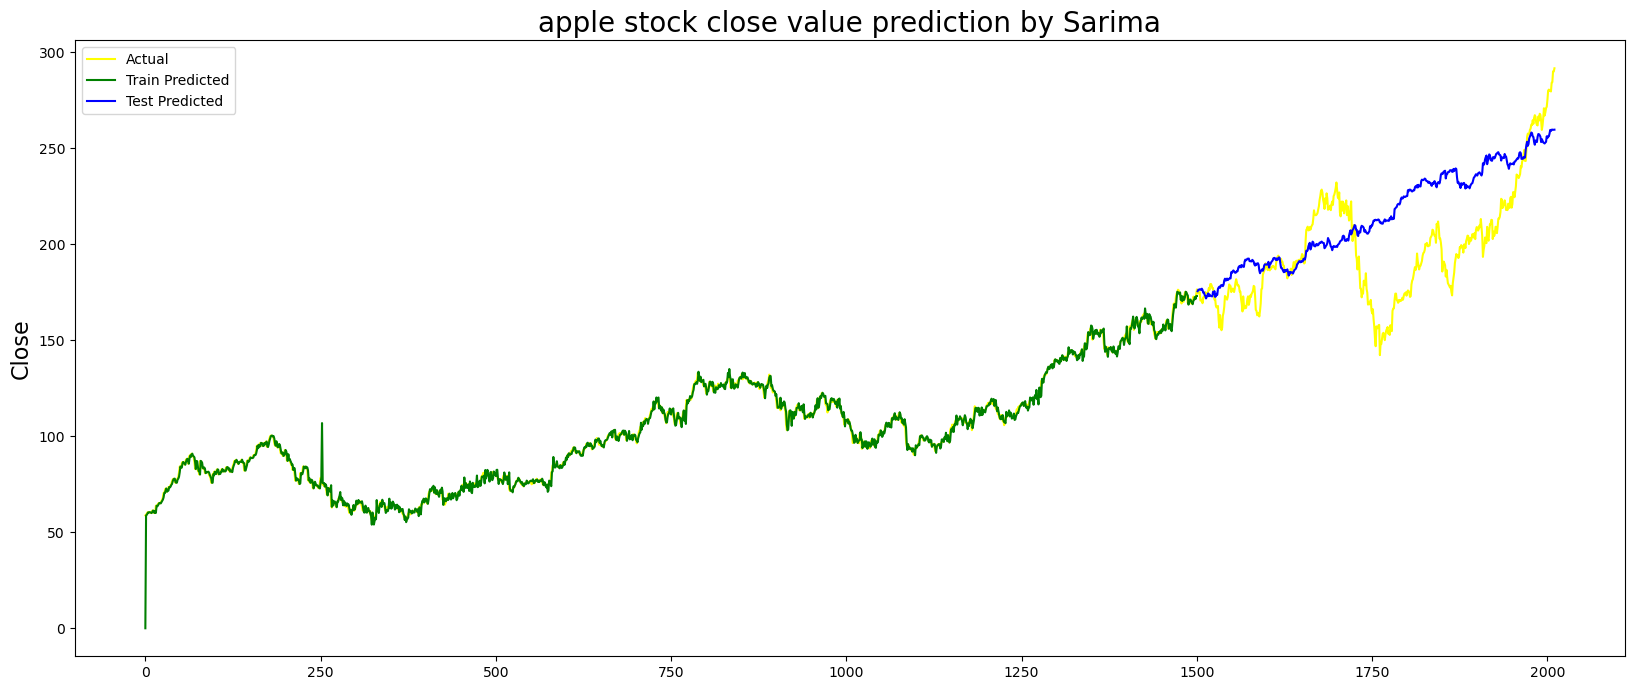

In [9]:
plt.figure(figsize=(20,8))
plt.plot(stock.Close, color='yellow',label="Actual")
plt.plot(train_pred110, color='green',label="Train Predicted")
plt.plot(test_pred110, color='blue', label="Test Predicted",)
plt.title('apple stock close value prediction by Sarima', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

In [10]:
#combined model

In [13]:
final_sarima110 = SARIMAX(stock['Close'], 
                 order=(1,1,0),
                seasonal_order=(1,1,0,252))

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                 2011
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 252)   Log Likelihood               -4182.502
Date:                             Fri, 07 Apr 2023   AIC                           8371.004
Time:                                     14:47:59   BIC                           8387.420
Sample:                                          0   HQIC                          8377.071
                                            - 2011                                         
Covariance Type:                            approx                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0231      0.024      0.969      0.332      -0.024       0.070
ar.S.L252     -0.5411      

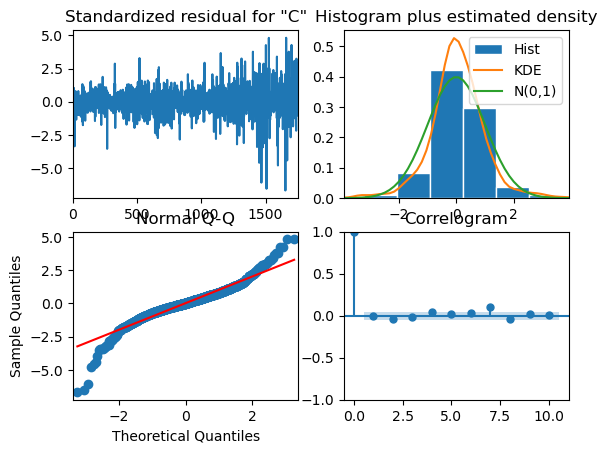

In [14]:
final_model110=final_sarima110.fit(disp=False,low_memory=True)

print(final_model110.summary())
print(final_model110.plot_diagnostics())

In [15]:
final_pred110=final_model110.predict(start=stock.Close.index[0], end=stock.Close.index[-1])
print('RMSE:' ,RMSE(final_pred110,stock.Close))

RMSE: 2.8831669735909378


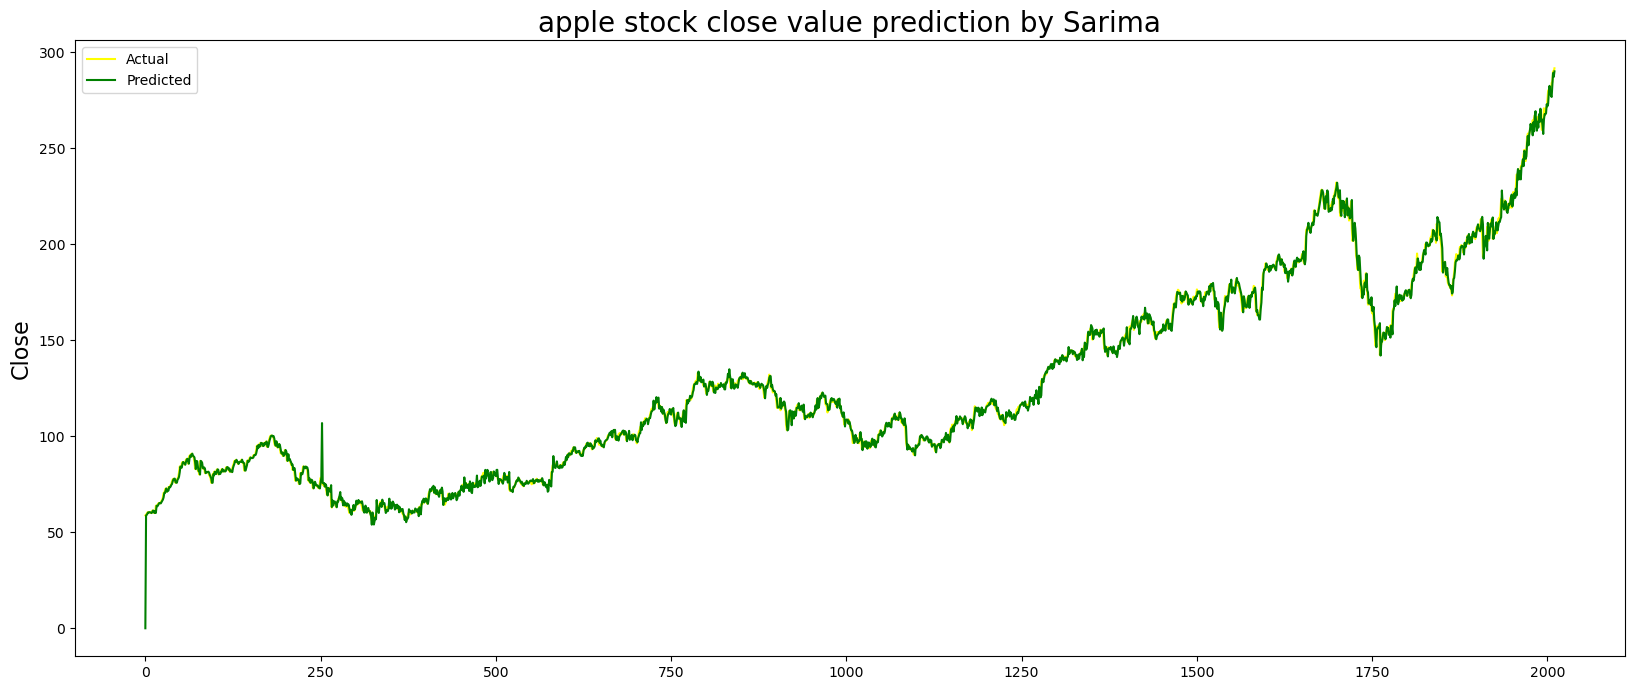

In [16]:
plt.figure(figsize=(20,8))
plt.plot(stock.Close, color='yellow',label="Actual")
plt.plot(final_pred110, color='green',label="Predicted")
plt.title('apple stock close value prediction by Sarima', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

In [21]:
from pickle import dump
from pickle import load
filename = 'final_sarima110_model.pkl'
dump(final_model110, open(filename, 'wb'))

In [25]:
loaded_model = load(open(filename, 'rb'))

result = loaded_model.forecast(252)
print(result)

2011    292.511171
2012    291.593564
2013    286.015163
2014    288.784275
2015    289.065751
           ...    
2258    339.437173
2259    337.450663
2260    345.633974
2261    345.031537
2262    345.864087
Name: predicted_mean, Length: 252, dtype: float64


<AxesSubplot:>

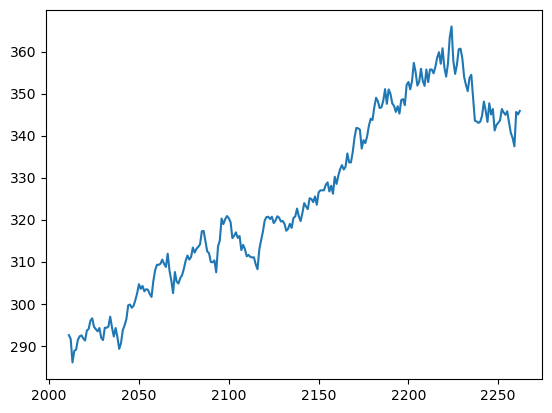

In [26]:
result.plot()